### --plotly visuals are commented due to GitHub file size restriction.--

In [168]:
import pandas as pd
import seaborn as sns
import plotly.express as px

# data import

In [169]:
df = pd.read_csv('spotify_data.csv')

In [170]:
df

,id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6zoTMGQKOFr7qkxeiUK12P,26,0.773,0.876,1,-4.806,1,0.0453,0.000473,0.000375,0.0629,0.4810,124.015,212364,4
1,6AoYWCzsDls6c61Zp5qTuU,0,0.858,0.697,2,-5.361,1,0.2300,0.114000,0.000000,0.2240,0.3640,98.012,290836,4
2,4VsMart0lkjUtyQnmxloK6,0,0.797,0.516,1,-6.286,1,0.0831,0.005380,0.431000,0.0728,0.0477,109.997,169320,4
3,15pUb5F93loQQWGN5yqB0y,45,0.591,0.286,5,-9.439,0,0.0261,0.419000,0.017100,0.1330,0.3110,73.367,263727,4
4,4txn9qnwK3ILQqv5oq2mO3,16,0.519,0.809,1,-6.362,1,0.5560,0.388000,0.000000,0.2750,0.2620,146.020,264213,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7595,06XQvnJb53SUYmlWIhUXUi,71,0.627,0.824,1,-3.419,1,0.1180,0.069900,0.000066,0.3100,0.7740,169.935,206000,4
7596,2RoXAULfl3NviNnuO4d0Ai,38,0.633,0.839,0,-6.302,0,0.0488,0.028100,0.001240,0.0823,0.3710,160.018,209899,4
7597,1ognDP1UWqfcPaOvlzTCXx,58,0.765,0.737,1,-4.587,1,0.0268,0.283000,0.000170,0.3460,0.8260,139.939,217233,4
7598,6truHRqDRQo3efQ33S9TYL,17,0.394,0.591,6,-3.833,1,0.0291,0.515000,0.000000,0.0765,0.3250,81.857,360067,4


<AxesSubplot:xlabel='popularity', ylabel='Count'>

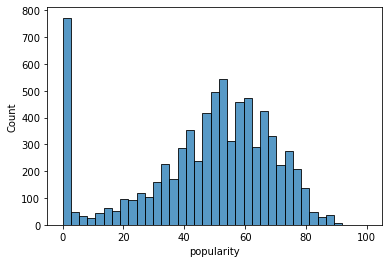

In [171]:
sns.histplot(df['popularity'])

In [172]:
# fig = px.histogram(df['popularity'])
# fig.show('notebook')

<AxesSubplot:>

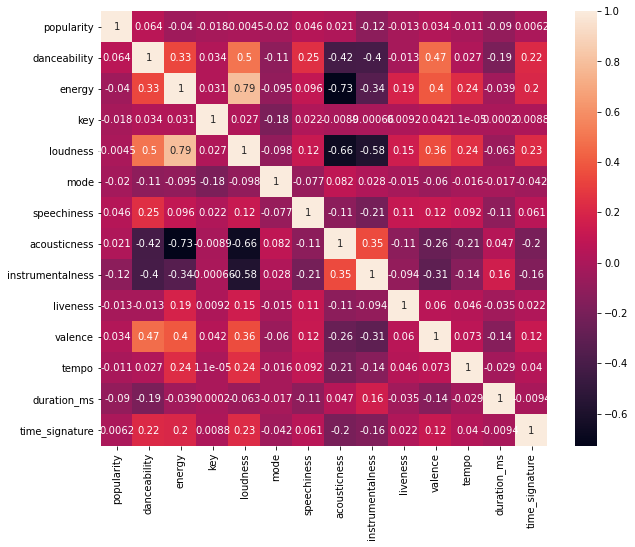

In [173]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot=True)

# feature selection

In [174]:
df.columns

Index(['id', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [175]:
X = df[['danceability', 'energy', 'key', 'loudness', 'mode',
        'speechiness', 'acousticness', 'instrumentalness',
        'liveness', 'valence', 'tempo', 'duration_ms',
        'time_signature']]

y = df['popularity']

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# LM model

In [178]:
from sklearn.linear_model import LinearRegression

In [179]:
lm = LinearRegression()

In [180]:
lm.fit(X_train, y_train)

LinearRegression()

In [181]:
# print the intercept
print(lm.intercept_)

50.12713379142405


# Model evaluation

In [182]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficient'])
largest = coeff_df.nlargest(3,'Coefficient')
largest.index.name = 'Feature'
largest

,Coefficient
Feature,
danceability,5.349318
acousticness,3.467171
speechiness,3.068770


> If I hold all other features fixed, a 1 unit increase in danceability of a track, is associated with an increase of 5.29 in popularity.

> If I hold all other features fixed, a 1 unit increase in acousticness of a track, is associated with an increase of 3.41 in popularity.

> If I hold all other features fixed, a 1 unit increase in speechiness of a track, is associated with an increase of 3.38 in popularity.

## Visuals of nlargest coefficients

<AxesSubplot:xlabel='popularity', ylabel='speechiness'>

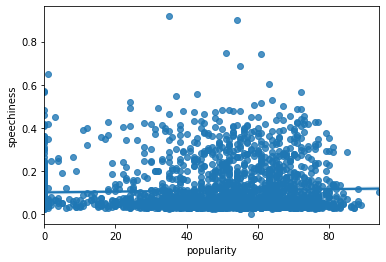

In [183]:
sns.regplot(x = y_test, y = X_test['speechiness'])

In [184]:
# fig = px.scatter(x = y_test, y = X_test['speechiness'], trendline="ols", labels={'x': 'popularity', 'y': 'speechiness'})
# fig.show('notebook')

<AxesSubplot:xlabel='popularity', ylabel='acousticness'>

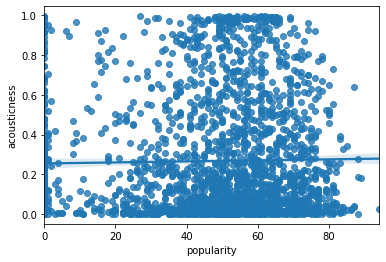

In [185]:
sns.regplot(x = y_test, y = X_test['acousticness'])

In [186]:
# fig = px.scatter(x = y_test, y = X_test['acousticness'], trendline="ols", labels={'x': 'popularity', 'y': 'acousticness'})
# fig.show('notebook')

<AxesSubplot:xlabel='popularity', ylabel='danceability'>

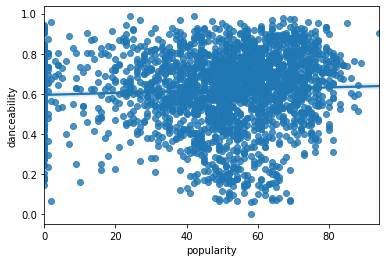

In [187]:
sns.regplot(x = y_test, y = X_test['danceability'])

In [188]:
# fig = px.scatter(x = y_test, y = X_test['danceability'], trendline="ols", labels={'x': 'popularity', 'y': 'danceability'})
# fig.show('notebook')

In [189]:
smallest = coeff_df.nsmallest(3, 'Coefficient')
smallest.index.name = 'Feature'
smallest

,Coefficient
Feature,
instrumentalness,-12.269307
liveness,-2.159614
mode,-2.022477


> If I hold all other features fixed, a 1 unit increase in instrumentalness of a track, is associated with a decrease of 12.52 in popularity.

> If I hold all other features fixed, a 1 unit increase in the liveness of a track, is associated with a decrease of 2.17 in popularity.

> If I hold all other features fixed, a 1 unit increase in mode of a track, is associated with a decrease of 2.08 in popularity.

## Visuals of nsmallest coefficients

<AxesSubplot:xlabel='popularity', ylabel='instrumentalness'>

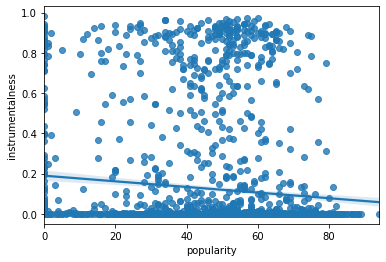

In [190]:
sns.regplot(x = y_test, y = X_test['instrumentalness'])

In [191]:
# fig = px.scatter(x = y_test, y = X_test['instrumentalness'], trendline="ols", labels={'x': 'popularity', 'y': 'instrumentalness'})
# fig.show('notebook')

<AxesSubplot:xlabel='popularity', ylabel='liveness'>

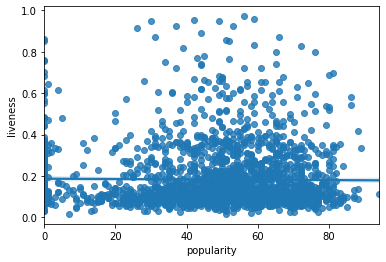

In [192]:
sns.regplot(x = y_test, y = X_test['liveness'])

In [193]:
# fig = px.scatter(x = y_test, y = X_test['liveness'], trendline="ols", labels={'x': 'popularity', 'y': 'liveness'})
# fig.show('notebook')

<AxesSubplot:xlabel='popularity', ylabel='mode'>

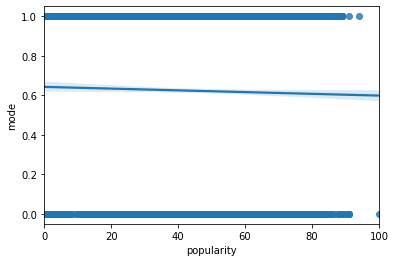

In [194]:
sns.regplot(x = df['popularity'], y = df['mode'])

In [195]:
# fig = px.scatter(x = df['popularity'], y = df['mode'], trendline="ols", labels={'x': 'popularity', 'y': 'mode'})
# fig.show('notebook')

# Predictions

X_test are features that the model has never seen before

In [196]:
popularity_predictions = lm.predict(X_test)

## Quick test

a track high in features with big impact on popularity

In [197]:
d = {'danceability': [1], 'energy': [0.5], 'key': [1], 'loudness': [-15] , 'mode': [0],
     'speechiness': [1], 'acousticness': [1], 'instrumentalness': [0], 'liveness': [0],
     'valence': [0.5], 'tempo': [100], 'duration_ms': [197000], 'time_signature': [3]}

a track low in features with big impact on popularity

In [198]:
d2 = {'danceability': [0], 'energy': [0.5], 'key': [1], 'loudness': [-15] , 'mode': [1],
     'speechiness': [0], 'acousticness': [0], 'instrumentalness': [1], 'liveness': [1],
     'valence': [0.5], 'tempo': [100], 'duration_ms': [197000], 'time_signature': [3]}

dataframe and results of hypothetically unpopular track

In [199]:
df2 = pd.DataFrame(data = d2)
df2

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,0.5,1,-15,1,0,0,1,1,0.5,100,197000,3


In [200]:
test_pred_bad = lm.predict(df2)
pop_pred_testbad = pd.DataFrame(test_pred_bad)
pop_pred_testbad.rename(columns={0:'predicted popularity'}, inplace = True)

In [201]:
pop_pred_testbad

,predicted popularity
0,32.50853


dataframe and results of hypothetically popular track

In [202]:
df = pd.DataFrame(data=d)
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1,0.5,1,-15,0,1,1,0,0,0.5,100,197000,3


In [203]:
test_pred = lm.predict(df)
pop_pred_test = pd.DataFrame(test_pred)
pop_pred_test.rename(columns={0:'predicted popularity'}, inplace = True)

In [204]:
pop_pred_test

,predicted popularity
0,60.845188


predicted popularities

In [205]:
pop_pred = pd.DataFrame(popularity_predictions)
pop_pred.rename(columns={0:'predicted popularity'}, inplace = True)
pop_pred.reset_index(drop = True)
pop_pred

,predicted popularity
0,47.722653
1,50.829785
2,53.333023
3,38.389189
4,48.329944
...,...
2275,47.759137
2276,44.128430
2277,45.440691
2278,44.703006


actual popularities

In [206]:
popularity_actual = pd.DataFrame(y_test)
popularity_actual.rename(columns={'popularity' : 'actual popularity'}, inplace = True)

In [207]:
popularity_actual.reset_index(drop = True)

,actual popularity
0,69
1,54
2,46
3,44
4,53
...,...
2275,67
2276,62
2277,0
2278,54


How far off are the predicted popularities from the actual popularity?

<AxesSubplot:xlabel='actual popularity', ylabel='predicted popularity'>

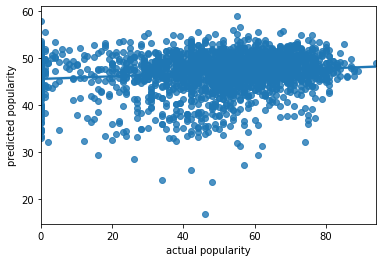

In [208]:
sns.regplot(x = popularity_actual['actual popularity'], y = pop_pred['predicted popularity'])

In [209]:
# fig = px.scatter(x = popularity_actual['actual popularity'], y = pop_pred['predicted popularity'], trendline="ols",
#                  labels = {'x': 'actual popularity', 'y': 'predicted popularity'})
# fig.show()

> A perfectly straight regression line would mean that my predictions were 100 percent correct. 

# Histogram of residuals

<AxesSubplot:xlabel='actual popularity', ylabel='predicted popularity'>

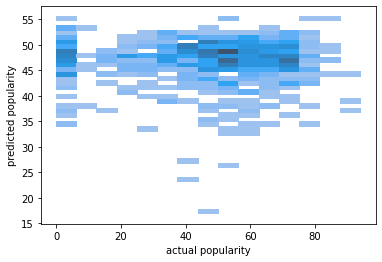

In [210]:
sns.histplot(x = popularity_actual['actual popularity'], y = pop_pred['predicted popularity'])

In [211]:
# fig = px.histogram(x = popularity_actual['actual popularity'], y = pop_pred['predicted popularity'],
#                    labels = {'x': 'actual popularity', 'y': 'predicted popularity'})
# fig.show('notebook')

Residuals are the difference between the actual popularity and predicted popularity.
> normally distributed means LM model was the correct choice for the data

# Eval Metrics

In [212]:
from sklearn import metrics
import numpy as np

In [213]:
print('MAE:', metrics.mean_absolute_error(popularity_actual, pop_pred))

print('MSE:', metrics.mean_squared_error(popularity_actual, pop_pred))

print('RMSE:', np.sqrt(metrics.mean_squared_error(popularity_actual, pop_pred)))

MAE: 17.116305788438925
MSE: 473.97108113863504
RMSE: 21.770876903299854


> variations on the difference betweeen predictions and true popularity